4422102/4422102 [==============================] - 0s 0us/step


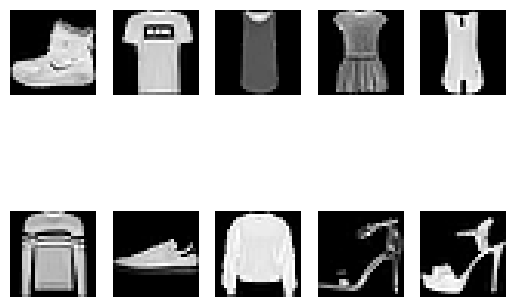

In [3]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Виводимо 10 зображень із тренувального датасету
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [4]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Конвертуємо цільові значення в категорії
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [5]:
# Створюємо модель
model = Sequential()

# Додаємо шари
model.add(Flatten(input_shape=(28, 28)))  # Розгортка 2D зображень у 1D
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Компільовуємо модель
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Виводимо архітектуру моделі
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Використовуємо колбеки для запобігання перенавчанню
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# Тренуємо модель
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4887 - accuracy: 0.8278 - val_loss: 0.4392 - val_accuracy: 0.8459 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3651 - accuracy: 0.8670 - val_loss: 0.3726 - val_accuracy: 0.8703 - lr: 0.0010
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3285 - accuracy: 0.8803 - val_loss: 0.3746 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3080 - accuracy: 0.8866 - val_loss: 0.3624 - val_accuracy: 0.8680 - lr: 0.0010
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2896 - accuracy: 0.8923 - val_loss: 0.3724 - val_accuracy: 0.8664 - lr: 0.0010
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2747 - accuracy: 0.8975 - val_loss: 0.3306 - val_accuracy: 0.8777 - lr: 0.0010
Epoch 7/20
1875/1875 [==============================] - 3s

In [7]:
# Зберігаємо модель у файл
model.save('fashion_mnist_model.h5')


c:\Users\User\miniconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


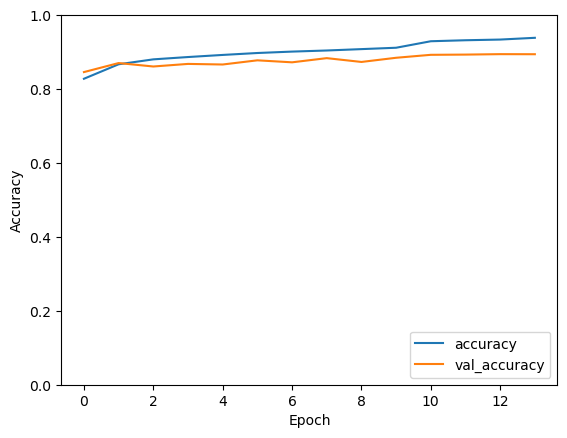

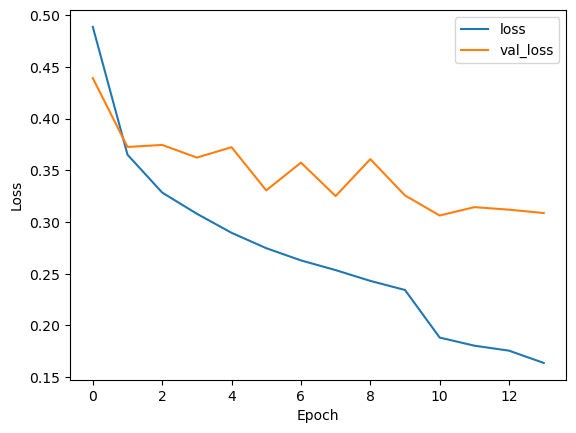

In [8]:
# Побудова графіків для функції втрат та точності
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [9]:
from sklearn.metrics import classification_report
import numpy as np

# Прогнозуємо на тестовому наборі
y_pred = model.predict(x_test)

# Перетворюємо передбачені і справжні класи в категорії
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Виводимо класифікаційний звіт
print(classification_report(y_true, y_pred_classes))


313/313 [==============================] - 0s 853us/step
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.80      0.81      1000
           3       0.90      0.90      0.90      1000
           4       0.80      0.84      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.73      0.71      0.72      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



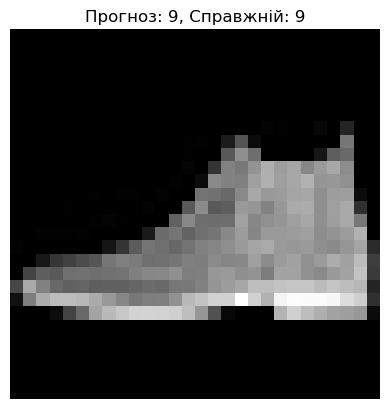

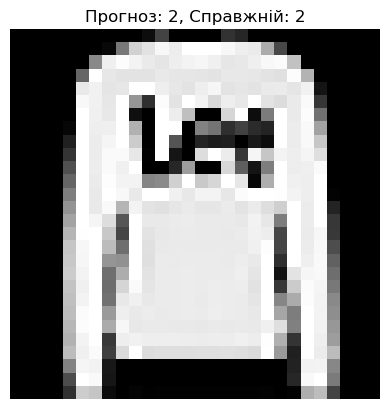

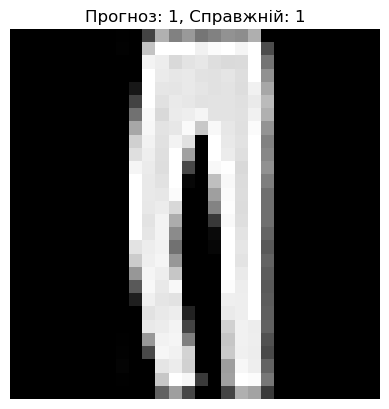

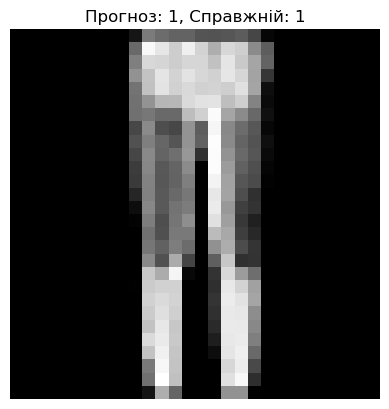

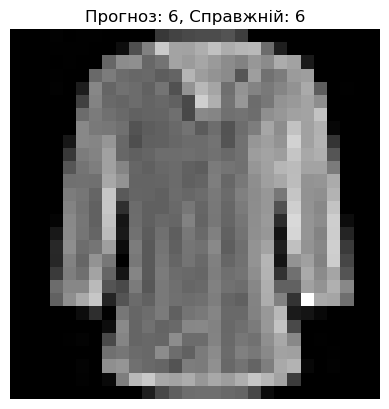

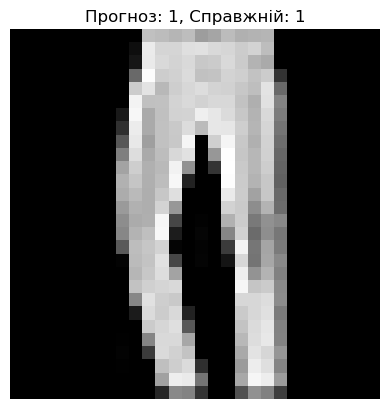

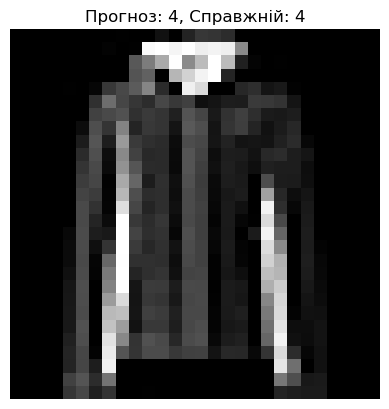

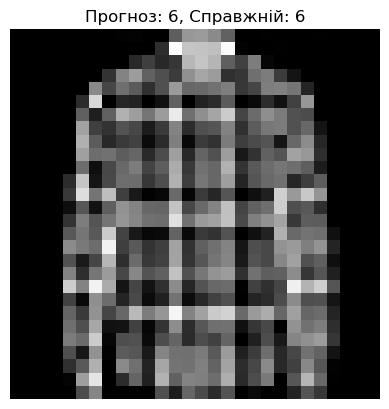

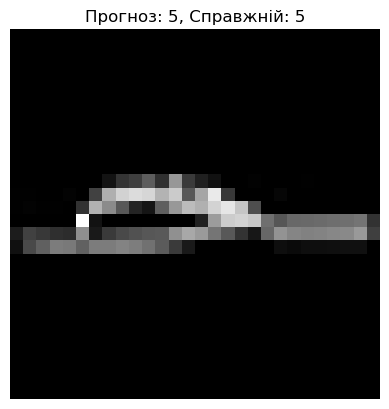

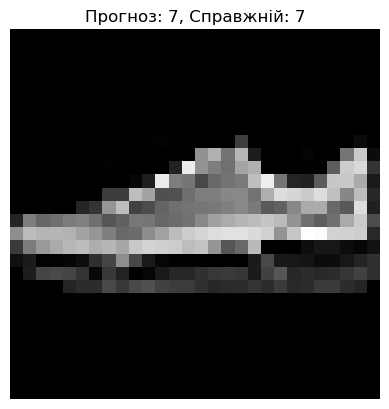

In [10]:
# Виведення кількох зображень із прогнозованими та справжніми класами
for i in range(10):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Прогноз: {y_pred_classes[i]}, Справжній: {y_true[i]}")
    plt.axis('off')
    plt.show()


За результатами класифікаційного звіту, нейронна мережа, побудована для розпізнавання зображень із датасету Fashion MNIST, досягла загальної точності 89% на тестових даних.
Найкращі показники точності спостерігаються для класів 1 (футболка) і 8 (сумка), де значення precision, recall і f1-score перевищують 96%. Водночас, класи 2 (пуловер) і 6 (сорочка) показали найнижчу точність, з f1-score на рівні 72-81%.